Title: Data-Driven Insights for Launching a Successful Movie Studio

Business Understanding Objectives
Identify Top-Performing Movie Genres
Analyze which genres (e.g., Action, Comedy, Drama) consistently generate the highest box office revenue to guide future content strategy.

Understand Key Success Drivers
Examine factors such as budget, runtime, star power, release season, and ratings to uncover what characteristics are common in high-grossing films.

Spot Market Gaps and Opportunities
Discover underrepresented genres or audience segments with growing popularity but limited competition—ideal for innovation and entry.

In [2]:
#import required libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Load CSV and TSV files

In [3]:
#CSV 
df_gross = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\bom.movie_gross (1).csv.gz", compression='gzip', encoding='utf-8')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
df_movies= pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\tmdb.movies (2).csv.gz", encoding='utf-8')
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
df_budgets=pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\tn.movie_budgets.csv.gz", compression='gzip', encoding='utf-8')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
#TSV
df_movie_info = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\rt.movie_info.tsv.gz", sep='\t')
df_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [7]:
df_reviews = pd.read_csv(
    r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\rt.reviews.tsv.gz",
    sep='\t',
    encoding='latin1',  # or sometimes 'ISO-8859-1'
    compression='gzip'  # because it's a .gz file
)
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
# Connect to the database
conn = sqlite3.connect(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\im.db (1)\im.db")

cursor = conn.cursor()

tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)
# Load a specific table
df_ratings = pd.read_sql('SELECT * FROM movie_ratings', conn)
df_ratings.head()


            name
0      directors
1      known_for
2  movie_ratings
3        writers
4        persons
5     movie_akas
6   movie_basics
7     principals


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Cleaning the database

In [11]:
#Loading the 'movie_basics' table
df_movie_basics = pd.read_sql('SELECT * FROM movie_basics', conn)
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
df_movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [13]:
df_directors = pd.read_sql('SELECT * FROM directors', conn)
df_directors.head()


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [14]:
df_directors.isna().sum()

movie_id     0
person_id    0
dtype: int64

In [15]:
df_known_for = pd.read_sql('SELECT * FROM known_for', conn)
df_known_for.head()
df_known_for.isna().sum()

person_id    0
movie_id     0
dtype: int64

In [16]:
df_writers = pd.read_sql('SELECT * FROM writers', conn)
df_writers.head()
df_writers.isna().sum()

movie_id     0
person_id    0
dtype: int64

In [17]:
df_principals= pd.read_sql('SELECT * FROM principals', conn)
df_principals.head()
df_principals.isna().sum()

movie_id      0
ordering      0
person_id     0
category      0
job           0
characters    0
dtype: int64

In [46]:
df_persons = pd.read_sql('SELECT * FROM persons', conn)
df_persons.isna().sum()

person_id             0
primary_name          0
birth_year            0
death_year            0
primary_profession    0
dtype: int64

In [47]:
df_movie_ratings = pd.read_sql('SELECT * FROM movie_ratings', conn)
df_movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [18]:
df_movie_info = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\rt.movie_info.tsv.gz", sep='\t')
df_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [19]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [20]:
df_movie_info.isna().sum()


id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [21]:
# Fill 'rating' and 'genre' missing values with 'Unknown'
df_movie_info['rating'] = df_movie_info['rating'].fillna('Unknown')
df_movie_info['genre'] = df_movie_info['genre'].fillna('Unknown')

# Fill 'director', 'writer', 'studio' with 'Unknown'
df_movie_info['director'] = df_movie_info['director'].fillna('Unknown')
df_movie_info['writer'] = df_movie_info['writer'].fillna('Unknown')
df_movie_info['studio'] = df_movie_info['studio'].fillna('Unknown')

# For 'runtime', fill missing values with 'Unknown'
df_movie_info['runtime'] = df_movie_info['runtime'].fillna('Unknown')

# Drop rows with missing 'box_office'
df_movie_info = df_movie_info.dropna(subset=['box_office'])

# Drop rows with missing 'theater_date' or 'dvd_date'
df_movie_info = df_movie_info.dropna(subset=['theater_date', 'dvd_date'])

# Convert 'theater_date' and 'dvd_date' to datetime
df_movie_info['dvd_date'] = pd.to_datetime(df_movie_info['dvd_date'], errors='coerce')
df_movie_info['theater_date'] = pd.to_datetime(df_movie_info['theater_date'], errors='coerce')

In [22]:
df_movie_info.isna().sum()# checking for missing values again

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [23]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 1 to 1555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            334 non-null    int64         
 1   synopsis      334 non-null    object        
 2   rating        334 non-null    object        
 3   genre         334 non-null    object        
 4   director      334 non-null    object        
 5   writer        334 non-null    object        
 6   theater_date  334 non-null    datetime64[ns]
 7   dvd_date      334 non-null    datetime64[ns]
 8   currency      334 non-null    object        
 9   box_office    334 non-null    object        
 10  runtime       334 non-null    object        
 11  studio        334 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 33.9+ KB


In [24]:
# Check for duplicates
duplicates = df_movie_info.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [25]:
# Save the cleaned DataFrame to a TSV file
df_movie_info.to_csv('cleaned_movie_info.tsv', sep='\t', index=False)


CLEANING CSV DATASET

In [26]:
df_movies= pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\tmdb.movies (2).csv.gz", encoding='utf-8')
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [27]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [28]:
df_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [29]:
# Check for duplicates
duplicates = df_movies.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


We can see that our data has no null values and no duplicates now we can proceed with it

CLEANING MOVIE GROSS DATA

In [30]:
df_gross = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\bom.movie_gross (1).csv.gz", compression='gzip', encoding='utf-8')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [31]:
df_gross.isna().sum()# checking for missing values again

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [32]:
#fill studio with 'Unknown'
df_gross['studio'] = df_gross['studio'].fillna('Unknown')

# Convert domestic_gross and foreign_gross to numeric
df_gross['domestic_gross'] = pd.to_numeric(df_gross['domestic_gross'], errors='coerce')
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'], errors='coerce')

# Fill missing values with 0
df_gross['domestic_gross'] = df_gross['domestic_gross'].fillna(0)
df_gross['foreign_gross'] = df_gross['foreign_gross'].fillna(0)

# Now create total_gross
df_gross['total_gross'] = df_gross['domestic_gross'] + df_gross['foreign_gross']

In [33]:
df_gross.head() #after cleaning and created total_gross column

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [34]:
df_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64

In [35]:
#saving the cleaened data to a csv file
df_gross.to_csv('cleaned_movie_gross.csv', index=False) #saving the cleaned data to a csv file

NOW CLEANING BUDGET DATASET

In [36]:
df_budgets=pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\tn.movie_budgets.csv.gz", compression='gzip', encoding='utf-8')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [37]:
df_budgets.isna().sum()# checking for missing values again

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [38]:
# Check for duplicates
duplicates = df_budgets.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


CLEANING REVIEWS DATASET

In [39]:
df_reviews = pd.read_csv(
    r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\rt.reviews.tsv.gz",
    sep='\t',
    encoding='latin1',  # or sometimes 'ISO-8859-1'
    compression='gzip'  # because it's a .gz file
)
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [40]:
df_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [41]:
#data cleaning
#fill 'publisher', ' review' and 'critic' with 'unknown'
df_reviews['publisher'] = df_reviews['publisher'].fillna('Unknown')
df_reviews['critic'] = df_reviews['critic'].fillna('Unknown')
df_reviews['review'] = df_reviews['review'].fillna('Unknown')

In [42]:
df_reviews.isna().sum()# checking for missing values again

id                0
review            0
rating        13517
fresh             0
critic            0
top_critic        0
publisher         0
date              0
dtype: int64

In [43]:
#dealing with cleaning rating separately
# Convert 'rating' to numeric, forcing errors to NaN and then fill missing values with 0
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')
df_reviews['rating'] = df_reviews['rating'].fillna(0)

In [44]:
df_reviews.isna().sum()# checking for missing values again

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [45]:
#save the cleaned DataFrame to a TSV file
df_reviews.to_csv('cleaned_movie_reviews.tsv', sep='\t', index=False) #saving the cleaned data to a csv file

Objective 1: Identify Top-Performing Movie Genres
Analyze which genres consistently generate the highest revenue.

movie_gross : Contains box office revenue — crucial for identifying top-performing genres.

movie_info : Has genre, title, and likely release_date — necessary to match revenue with genre.

Database : includes title, genre, it can validate or enrich the above info.

Objective 2: Understand Key Success Drivers
Analyze budget, runtime, star power, release season, and ratings.

budgets : Essential to compare budget vs. revenue (ROI).

movie_info: Includes runtime, genre, release date (for seasonality).

reviews	: Might include Rotten Tomatoes or critic/audience ratings.

Database :  ratings, runtime, votes — useful for correlation with success.

Objective 3: Spot Market Gaps and Opportunities
Find underrepresented but growing genres or audience segments.

movie_info : Genre and release date help you track underrepresented areas.

reviews : High-rated but low-volume genres = opportunities.

Database : Helps analyze genres or rating trends over years if year or rating info is present.

DATA ANALYSIS

In [48]:
#MERGING DATA
# Merge df_movies and df_gross on 'movie_title' and movie_basics
import pandas as pd
import sqlite3

# Step 1: Load the CSV files
df_csv_movies = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\tmdb.movies (2).csv.gz')  # Regular CSV file
df_csv_gross = pd.read_csv(r'C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\cleaned_movie_gross.csv')  # Cleaned gross data

# Step 2: Connect to the database and fetch the movie_basics table
conn = sqlite3.connect(r'C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\im.db (1)\im.db')
# Fetch the movie_basics table from the database
query = "SELECT * FROM movie_basics"
df_db = pd.read_sql(query, conn)

# Step 3: Merge the CSV data on 'movie_title'
# Merge df_csv_movies with df_csv_gross on 'movie_title'
df_merged = pd.merge(df_csv_movies, df_csv_gross, on='title', how='inner')

# Step 4: Merge with the database data on 'movie_title'
df_merged = pd.merge(df_merged, df_db, on='original_title', how='inner')

# Step 5: View the merged data
print(df_merged.head())

   Unnamed: 0            genre_ids     id original_language  \
0           1  [14, 12, 16, 10751]  10191                en   
1           2        [12, 28, 878]  10138                en   
2           4        [28, 878, 12]  27205                en   
3           7      [16, 10751, 35]  10193                en   
4           8      [16, 10751, 35]  20352                en   

             original_title  popularity release_date  \
0  How to Train Your Dragon      28.734   2010-03-26   
1                Iron Man 2      28.515   2010-05-07   
2                 Inception      27.920   2010-07-16   
3               Toy Story 3      24.445   2010-06-17   
4             Despicable Me      23.673   2010-07-09   

                      title  vote_average  vote_count studio  domestic_gross  \
0  How to Train Your Dragon           7.7        7610   P/DW     217600000.0   
1                Iron Man 2           6.8       12368   Par.     312400000.0   
2                 Inception           8.3   

Objective 1: Identify Top-Performing Movie Genres
"Analyze which genres consistently generate the highest revenue."

      genres   total_gross
1  Adventure  1.318687e+11
0     Action  1.108914e+11
7      Drama  8.744477e+10
4     Comedy  8.608314e+10
2  Animation  4.537258e+10


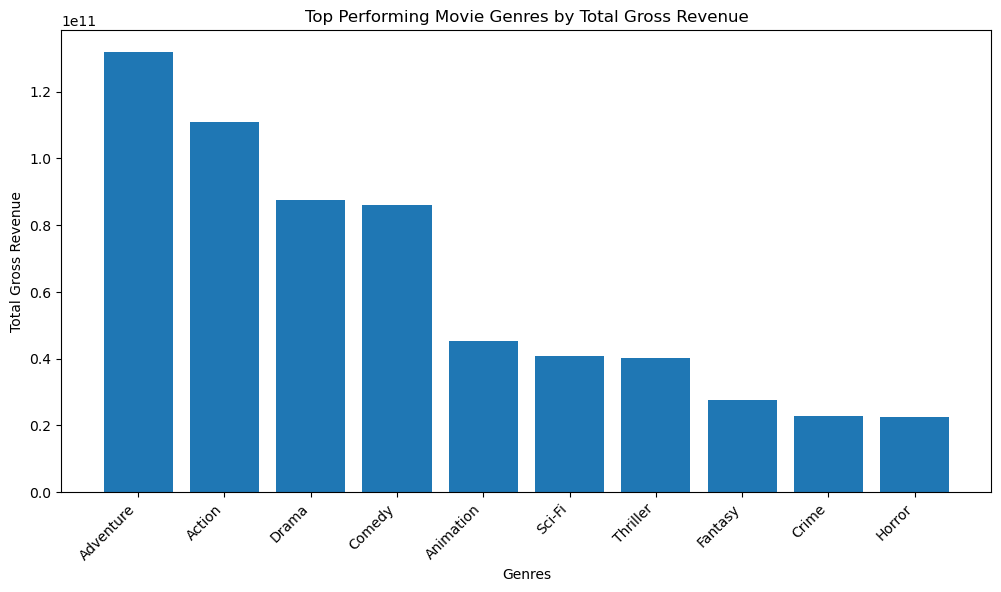

In [49]:
import pandas as pd

# Step 1: Explode the 'genres' column into individual genres
df_genres = df_merged.copy()  # To preserve original data
df_genres['genres'] = df_genres['genres'].str.split(',')  # Convert string to list
df_genres_exploded = df_genres.explode('genres')  # Explode the list into rows

# Step 2: Group by genre and sum the total gross revenue
genre_revenue = df_genres_exploded.groupby('genres')['total_gross'].sum().reset_index()

# Step 3: Sort by total gross revenue in descending order
genre_revenue_sorted = genre_revenue.sort_values(by='total_gross', ascending=False)

# Step 4: Display top genres with highest total gross revenue
print(genre_revenue_sorted.head())

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(genre_revenue_sorted['genres'][:10], genre_revenue_sorted['total_gross'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top Performing Movie Genres by Total Gross Revenue')
plt.xlabel('Genres')
plt.ylabel('Total Gross Revenue')
plt.show()

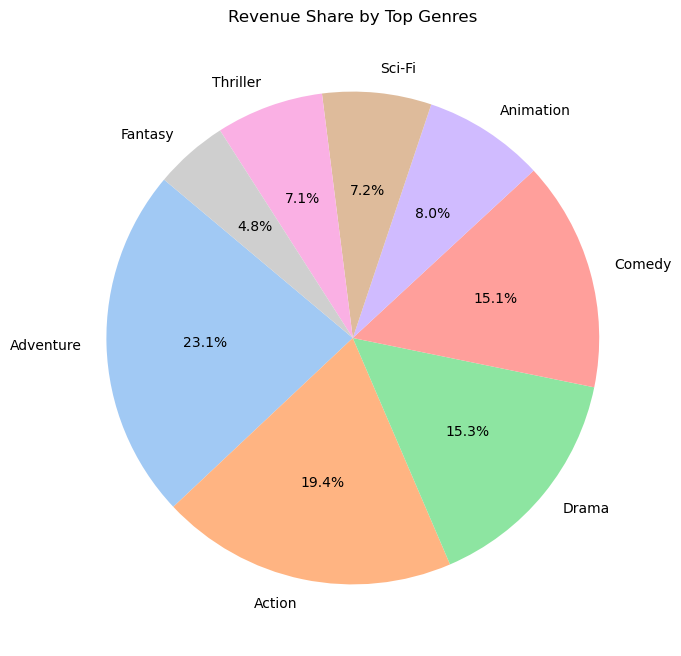

In [50]:
top_genres = genre_revenue.sort_values('total_gross', ascending=False).head(8)  # top 8 genres

plt.figure(figsize=(8,8))
plt.pie(top_genres['total_gross'], labels=top_genres['genres'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Share by Top Genres')
plt.show()

Adventure, action and drama showed the most top revenue contributors according to the genres

Objective 2: Understand Key Success Drivers
Analyze budget, runtime, star power, release season, and ratings.

In this objective i will merge gross database with budget using title so as to achieve this objective

In [51]:
import pandas as pd

# Step 1: Read both datasets
df_gross = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\cleaned_movie_gross.csv")
df_budget = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\tn.movie_budgets.csv.gz", compression='gzip', encoding='utf-8')

# Step 2: Make sure the movie title columns match in type and case
df_gross['title'] = df_gross['title'].astype(str).str.lower().str.strip()
df_budget['movie'] = df_budget['movie'].astype(str).str.lower().str.strip()

# Step 3: Merge based on movie names
df_gross_budget = pd.merge(df_gross, df_budget, left_on='title', right_on='movie', how='inner')

# Step 4: View the merged DataFrame
print(df_gross_budget.head())

                        title studio  domestic_gross_x  foreign_gross  year  \
0                 toy story 3     BV       415000000.0    652000000.0  2010   
1                   inception     WB       292600000.0    535700000.0  2010   
2         shrek forever after   P/DW       238700000.0    513900000.0  2010   
3  the twilight saga: eclipse   Sum.       300500000.0    398000000.0  2010   
4                  iron man 2   Par.       312400000.0    311500000.0  2010   

    total_gross  id  release_date                       movie  \
0  1.067000e+09  47  Jun 18, 2010                 toy story 3   
1  8.283000e+08  38  Jul 16, 2010                   inception   
2  7.526000e+08  27  May 21, 2010         shrek forever after   
3  6.985000e+08  53  Jun 30, 2010  the twilight saga: eclipse   
4  6.239000e+08  15   May 7, 2010                  iron man 2   

  production_budget domestic_gross_y worldwide_gross  
0      $200,000,000     $415,004,880  $1,068,879,522  
1      $160,000,000     

Now lets use the above data to achieve objective 2

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\USER\AppData\Local\Temp\ipykernel_3080\1009125486.py:6: SyntaxWarning: invalid escape sequence '\$'
  df_gross_budget['production_budget_clean'] = df_gross_budget['production_budget'].replace('[\$,]', '', regex=True).astype(float)


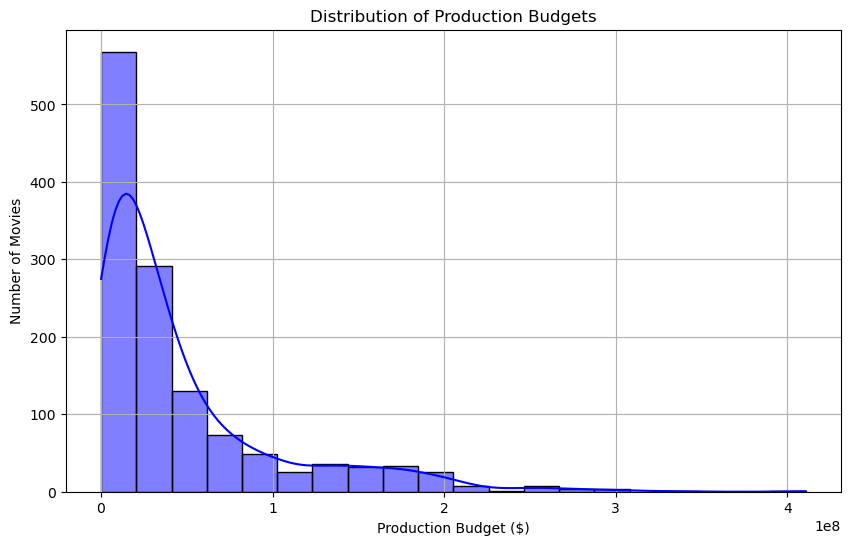

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean the 'production_budget' column
df_gross_budget['production_budget_clean'] = df_gross_budget['production_budget'].replace('[\$,]', '', regex=True).astype(float)
# cleaning the column because its stored as a string with dollar signs and python needs the values to be in  numbers

# Step 2: Create a  histplot
plt.figure(figsize=(10, 6))
sns.histplot(df_gross_budget['production_budget_clean'], bins=20, kde=True, color='blue')

# Step 3: Customize the plot
plt.title('Distribution of Production Budgets')
plt.xlabel('Production Budget ($)')
plt.ylabel('Number of Movies')
plt.grid(True)

# Show the plot
plt.show()

Shows how many movies falls in different budget ranges
The smooth line visualizes the overall trend in production budgets 
Therefore it basically explains are most movies high budget or low budget?"

Pie Chart

Show which studio earned the most in total gross.

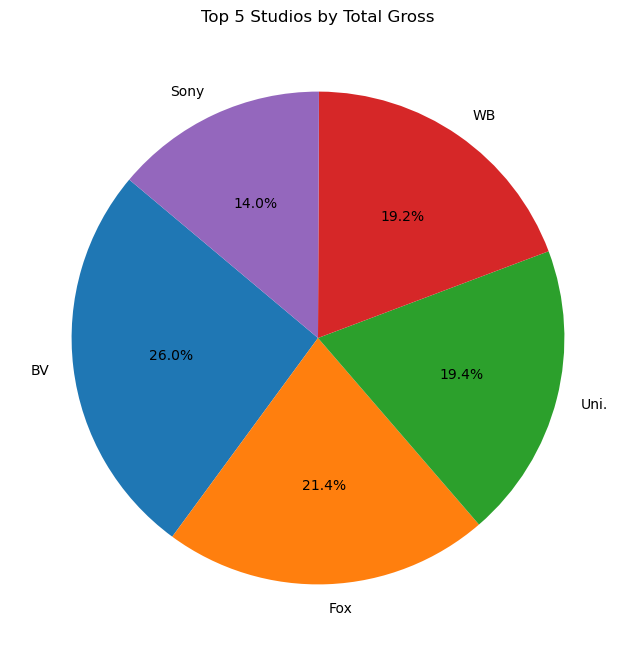

In [53]:
# Group by studio and sum total gross
studio_gross = df_gross_budget.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(8,8))
plt.pie(studio_gross, labels=studio_gross.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Studios by Total Gross')
plt.show()

This pie chart tells us who dominates the movie industry, which is a key factor because studio resources, marketing power, and production budgets often strongly influence a movie's success.

By understanding which studios dominate the box office, we avoid unrealistic competition and instead find smarter, more strategic opportunities to succeed. they should focus on other genres because they are new to business so as to understand the business first instaed of competing with the genres that this big studios already does 

OBJECTIVE 3

Uisng movie dataset and movie_basics from the database  to analyze the rating and genre to spot underrepresented genres that are receiving high ratings.

In [54]:
#load movie_basics to a dataframe
import pandas as pd
import sqlite3
# Connect to the SQLite database
conn = sqlite3.connect(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\im.db (1)\im.db")
# Load the movie_basics table into a DataFrame
movie_basics_df= pd.read_sql('SELECT * FROM movie_basics', conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [55]:
#load movies 
df_movies= pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\PROJECT FOLDER\tmdb.movies (2).csv.gz", encoding='utf-8')
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [56]:
#now merge the two dataframes on original_title and title
df_merged = pd.merge(movie_basics_df, df_movies, left_on='original_title', right_on='title', how='inner')
df_merged.head()

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0112502,Bigfoot,Bigfoot,2017,0.0,"Horror,Thriller",5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,Bigfoot,2.9,26
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",8456,"[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,Foodfight!,2.1,46
3,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",9600,"[35, 18]",323498,en,Return to Babylon,0.877,2013-08-11,Return to Babylon,7.0,1
4,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,1243,[35],112074,en,Life's a Beach,1.206,2010-01-01,Life's a Beach,3.2,3


In [57]:
 #Count Movies per Genre
 # Split genres and explode to count occurrences
df_genres= df_movies['genre_ids'].str.split(',', expand=True).stack().reset_index(drop=True)
df_movies['genre_ids'] = df_genres

# Count the number of movies per genre
genre_counts = df_movies['genre_ids'].value_counts().reset_index()
genre_counts.columns = ['genre_ids', 'movie_count']

# Display the genre counts
genre_counts.head()

,genre_ids,movie_count
0,[99],1930
1,[],1622
2,[18,1476
3,[18],1270
4,[35,1190


In [58]:
#Calculate Average Rating per Genre
average_rating = df_movies.groupby('genre_ids')['vote_average'].mean().reset_index()
average_rating.columns = ['genre_ids', 'average_rating']
average_rating = average_rating.sort_values(by='average_rating', ascending=False)
average_rating.head()

,genre_ids,average_rating
26,37,6.800000
6,10752,6.780000
64,[37,6.594118
63,[36],6.560000
8,10770,6.339286


<function matplotlib.pyplot.show(close=None, block=None)>

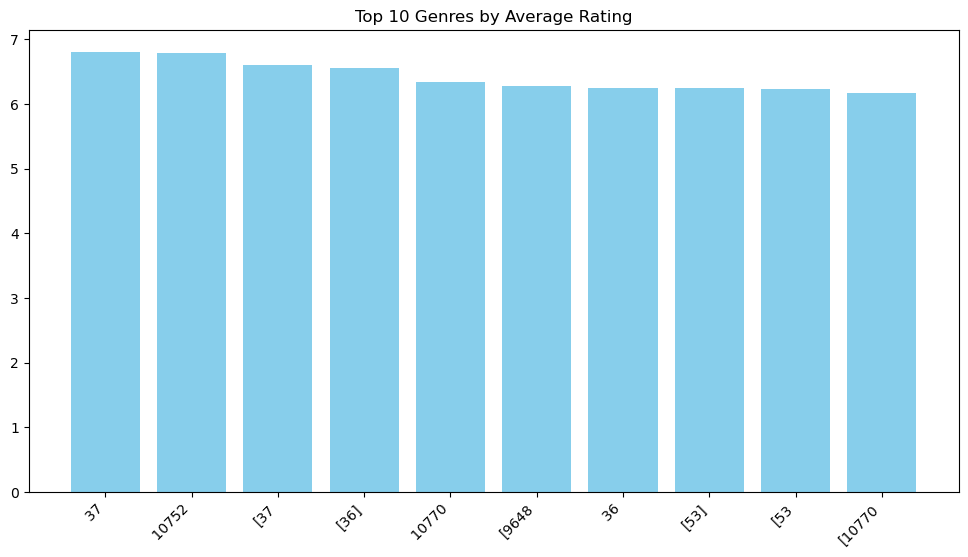

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(average_rating['genre_ids'][:10], average_rating['average_rating'][:10], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Genres by Average Rating')
plt.show


CONCLUSIONS AND RECCOMENDATIONS 

CONCLUSION

In objective 1 :Movies in adventure, action and drama  are more likely to perform well at the box office, making them attractive genres for studios seeking high revenue returns.

Genres like crime and horror  while popular in volume, generated lower total grosses compared to action-packed or fantastical genre

In objective 2: It tells  us who dominates the movie industry, which is a key factor because studio resources, marketing power, and production budgets often strongly influence a movie's success.

By understanding which studios dominate the box office, we avoid unrealistic competition and instead find smarter, more strategic opportunities to succeed. they should focus on other genres because they are new to business so as to understand the business first instaed of competing with the genres that this big studios already does 

RECOMENDATIONS

Studios should prioritize the production and marketing of action, adventure, and drama movies, as these genres have demonstrated strong box office performance. Investing in these genres can maximize revenue potential and audience reach.
Additionally, allocating higher budgets to storytelling, visual effects, and promotional campaigns in these categories will likely enhance both profitability and brand reputation.

